# Gerardo de Miguel González

---

## Assignment I: Exercises on Introduction to Python

### Exercise 2: Exercises from SciPy Lectures

Program the three basic exercises from the Python Language intro of SciPy Lectures [1] given in Control Flow and Defining Functions sections [2][3].

### References

[1] [SciPy Lectures Python Language Intro](http://www.scipy-lectures.org/intro/language/python_language.html)

[2] [Control Flow](http://www.scipy-lectures.org/intro/language/control_flow.html)

[3] [Defining Functions](http://www.scipy-lectures.org/intro/language/functions.html)

### Compute Pi number

Compute the decimals of Pi using the Wallis formula:

>$\pi = 2 \prod_{i=1}^{\infty} \frac{4i^2}{4i^2 - 1}$

In [0]:
#::GMG::Topics used: keyword parameter, if/elif/else, defensive programming,
#       for loop, iterable range(start, end, step), Docstring,
#       Wallis formula as seen at
#       https://en.wikipedia.org/wiki/Wallis_product
def aproxpi(n=1000):
    """Compute pi using n terms of Wallis' product.
    
    aproxpi(n) = 2 \prod_{i=1}^{n}\frac{4i^2}{4i^2-1}

    Args:
        n (int): The upper limit of the iterations at Wallis' formula, 
                 from 1 to `n`. n > 0. Default to 1000.

    Yields:
        float: The approximation of pi if n is valid
        None: If n is invalid

    Examples:

        >>> print(aproxpi(1000000))
        3.141591868191753

        >>> print(aproxpi(-10))
        ERROR: n not valid: aproxpi(n) | n > 0
        None

    """
    pimedios = 4/3
    if not isinstance(n,int):
      print("ERROR:n not valid: aproxpi(n) | n is integer")
      return None
    elif n < 1:
      print("ERROR: n not valid: aproxpi(n) | n > 0")
      return None
    else:
      for i in range(2,n+1):
        num = 2*i
        pimedios *= (num/(num-1))*(num/(num+1))
    return 2*pimedios


In [0]:
  #::GMG::Test
  #       Corner cases
  pi = aproxpi(3 + 5j)
  display((pi, type(pi)))
  pi = aproxpi(-100)
  display((pi, type(pi)))
  pi = aproxpi(0)
  display((pi, type(pi)))
  pi = aproxpi(1)
  display((pi, type(pi)))
  pi = aproxpi(2)
  display((pi, type(pi)))
  pi = aproxpi()
  display((pi, type(pi)))
  pi = aproxpi(1000000)
  display((pi, type(pi)))
  #::GMG::Test
  #       Wide cases
  #       List comprehension style (!!) :))
  [print (i) for i in list(map(aproxpi,range(1000,20000,1000)))]
  #::GMG::Docstring test
  help(aproxpi)

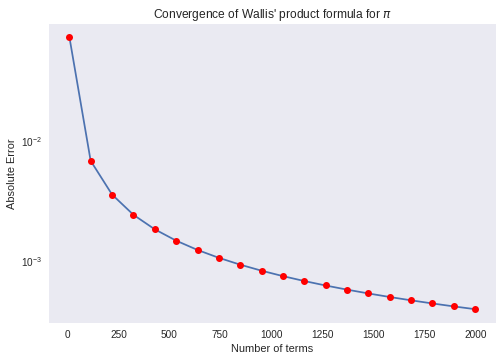

In [41]:
#::GMG::Bonus: Standing on the shoulders of giants
#       https://en.wikipedia.org/wiki/Standing_on_the_shoulders_of_giants
#
#       Simple convergence demo.
#
#::GMG::Credit -- ellisonbg/py4science
#       https://github.com/ellisonbg/py4science/blob/master/book/examples/wallis_pi.py

# A few modules we need
from matplotlib import pyplot as plt
import numpy as np

#::GMG::But before diving into it I have drop out my defensive programming
#       because my aproxpi instead of dealing with plain old int, it's going to
#       find numpy.int32 strange things as parameter ... 
def aproxpi(n=1000):
  pimedios = 4/3
  for i in range(2,n+1):
    num = 2*i
    pimedios *= (num/(num-1))*(num/(num+1))
  return 2*pimedios  

# Create a list of points 'nrange' where we'll compute Wallis' formula
nrange = np.linspace(10,2000,20).astype(int)

# Make an array of such values
wpi = list(map(aproxpi,nrange))
# Compute the difference against the value of pi in numpy (standard
# 16-digit value)
#::GMG::Fixed it because "-" is not supported between list and float(!)
#       see https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.subtract.html
#diff = abs(wpi-np.pi)
diff=abs(np.subtract(wpi,np.pi))

# Make a new figure and build a semilog plot of the difference so we can
# see the quality of the convergence
plt.figure()
# Line plot with red circles at the data points
plt.semilogy(nrange,diff,'-o',mfc='red')

# A bit of labeling and a grid
plt.title(r"Convergence of Wallis' product formula for $\pi$")
plt.xlabel('Number of terms')
plt.ylabel(r'Absolute Error')
plt.grid()

# Display the actual plot
plt.show()


### Fibonacci sequence

Write a function that displays the n first terms of the [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number), defined by:

>$\left\{
    \begin{array}{ll}
        U_{0} = 0 \\
        U_{1} = 1 \\
        U_{n+2} = U_{n+1} + U_{n}
    \end{array}
\right.$

In [0]:
#::GMG::Topics used: keyword parameter, while loop, defensive programming,
#       Docstring, multiple assignment, simple fibonacci algorithm as
#       described at
#       https://en.wikipedia.org/wiki/Fibonacci_number
def fibonacci(n=10):
  """Display the n first terms of Fibonacci sequence.
  
  F_n = F_n-1 + F_n-2  
  
  with seeds
  
  F_0 = 0, F_1 = 1
  
  Args:
    n (int): numbers in the sequence to be printed.
             n > 0. Default to 10.

  Yields:
    screen: column of n first numbers of fibonacci sequence or error message if
            n is not valid
    True:  if n is valid
    False: if n is not invalid

  Examples:

    >>> fibonacci()
    0
    1
    1
    2
    3
    5
    8
    13
    21
    34

    >>> fibonacci(-10)
    ERROR: n not valid: fibonacci(n) | n > 0
  """
  if not isinstance(n,int):
    print("ERROR:n not valid: fibonacci(n) | n is integer")
    return False
  elif n <= 0:
    print("ERROR:n not valid: fibonacci(n) | n > 0")
    return False
  else:  
    f0, f1 = 0, 1 #seeds
    #::GMG::Wikipedia (sic) ...
    #   ... in modern usage, the sequence is extended by one more initial term
    print (f0)
    count = 1
    while count < n:
      print (f1)
      f0, f1 = f1, f0 + f1
      count += 1
    return True

In [0]:
#::GMG::Test
#       Corner cases
print(fibonacci(2-3j))
print(fibonacci(1))
fibonacci(-10)
fibonacci()
fibonacci(0)
#       n=5
fibonacci(5)
#       Docstring
help(fibonacci)

:**:GMG::**I've found out how *to draw* a fibonacci sequence but have no time here. So I'll leave it TODO :)

  - Trinket: [Draw the Fibonacci Spiral using Turtle Graphics](https://trinket.io/python/43bc79b582)
  - Python4Enlightening: [Fibonacci Mystery Pythonified](http://junilyd.github.io/blog/2014/08/13/fibonacci-mystery-pythonified/)
  

### Quicksort

Implement the quicksort algorithm, as defined by [wikipedia](https://en.wikipedia.org/wiki/Quicksort):

```
function quicksort(array)
    var list less, greater
    if length(array) < 2
        return array
    select and remove a pivot value pivot from array
    for each x in array
        if x < pivot + 1 then append x to less
        else append x to greater
    return concatenate(quicksort(less), pivot, quicksort(greater))
```

